In [37]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

In [55]:
df_X = np.array(df_X)
df_y = np.array(df_y)

diabetes.feature_names
print(df_X[0])

[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=4)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(331, 10) (111, 10)
(331,) (111,)


In [48]:
def model(X, W, b):
  predictions = 0
  for i in range(X.shape[1]):
    predictions += X[:, i] * W[i]
  predictions += b
  return predictions

In [71]:
from sklearn.metrics import mean_squared_error
def MSE(a, b):
  mse = mean_squared_error(a, b)
  return mse

def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = MSE(predictions, y)
  return L

def gradient(X, W, b, y):
  N = len(y)
  y_pred = model(X, W, b)

  dw = 1/N *2* X.T.dot(y_pred - y)
  db = 2*(y_pred-y).mean()

  return dw, db

In [78]:
learning_rates = [0.5, 0.1, 0.05, 0.01]

losses_lr = []
for learning_rate in learning_rates:
  W, b = np.random.rand(X_train.shape[1]),  np.random.rand()
  losses = []
  for i in range(1, 5001):
    dw, db = gradient(X_train, W, b, y_train)
    W -= learning_rate*dw
    b -= learning_rate*db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
      print('Iteration %d : Loss %0.4f' % (i, L))
  losses_lr.append([losses, W, b])

Iteration 10 : Loss 5673.0065
Iteration 20 : Loss 5340.3727
Iteration 30 : Loss 5057.2507
Iteration 40 : Loss 4815.6828
Iteration 50 : Loss 4609.0212
Iteration 60 : Loss 4431.7109
Iteration 70 : Loss 4279.1084
Iteration 80 : Loss 4147.3311
Iteration 90 : Loss 4033.1307
Iteration 100 : Loss 3933.7890
Iteration 110 : Loss 3847.0295
Iteration 120 : Loss 3770.9449
Iteration 130 : Loss 3703.9362
Iteration 140 : Loss 3644.6615
Iteration 150 : Loss 3591.9940
Iteration 160 : Loss 3544.9867
Iteration 170 : Loss 3502.8423
Iteration 180 : Loss 3464.8896
Iteration 190 : Loss 3430.5619
Iteration 200 : Loss 3399.3808
Iteration 210 : Loss 3370.9411
Iteration 220 : Loss 3344.8997
Iteration 230 : Loss 3320.9647
Iteration 240 : Loss 3298.8878
Iteration 250 : Loss 3278.4572
Iteration 260 : Loss 3259.4915
Iteration 270 : Loss 3241.8350
Iteration 280 : Loss 3225.3539
Iteration 290 : Loss 3209.9326
Iteration 300 : Loss 3195.4707
Iteration 310 : Loss 3181.8811
Iteration 320 : Loss 3169.0879
Iteration 330 : L

learning rate: 0.5
mse loss: 2902.11998423429


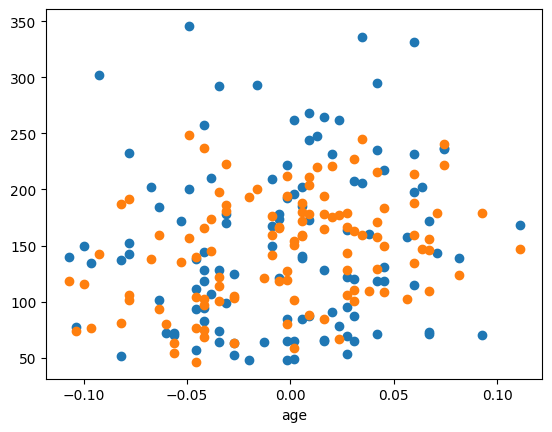

learning rate: 0.1
mse loss: 2902.0169391660875


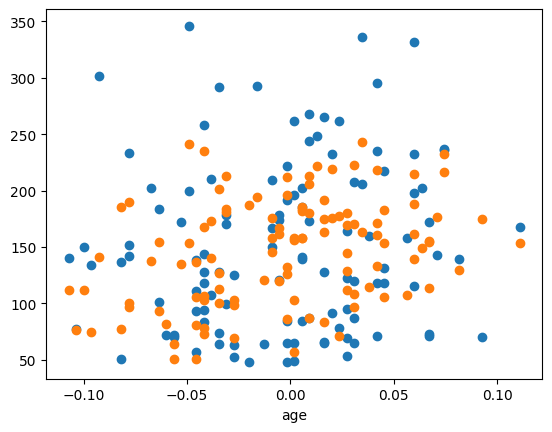

learning rate: 0.05
mse loss: 3015.600064642119


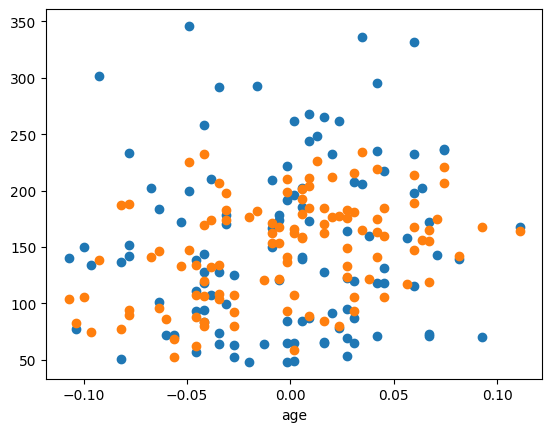

learning rate: 0.01
mse loss: 3773.0999401123186


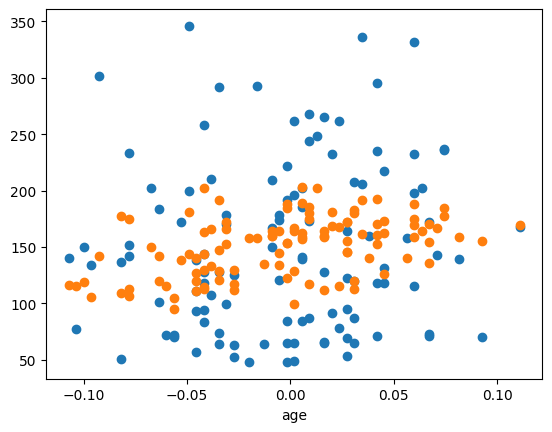

In [79]:
import matplotlib.pyplot as plt

for idx, [losses, W, b] in enumerate(losses_lr):
  prediction = model(X_test, W, b)
  mse = loss(X_test, W, b, y_test)
  print(f'learning rate: {learning_rates[idx]}')
  print(f'mse loss: {mse}')

  plt.scatter(X_test[:, 0], y_test)
  plt.scatter(X_test[:, 0], prediction)
  plt.xlabel(diabetes.feature_names[0])
  plt.show()